In [47]:
# -*- coding: utf-8 -*-

In [48]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [49]:
import os
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt 
#import csv

#Api de datosabiertos.gov
from sodapy import Socrata

In [50]:
#Ver n columnas y filas para data frames
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 200)

# Consulta de info a Datos abiertos

Se usa Socrata como plataforma de catálogo de datos abiertos tipo SaaS que facilita una versión de código abierto de su API para el acceso y actualización de los datos

In [51]:
# Enter the information from those sections here
socrata_domain = 'www.datos.gov.co'
socrata_dataset_identifier = 'rpmr-utcd'

# App Tokens can be generated by creating an account at https://opendata.socrata.com/signup
# Tokens are optional (`None` can be used instead), though requests will be rate limited.
#
# If you choose to use a token, run the following command on the terminal (or add it to your .bashrc)
# $ export SODAPY_APPTOKEN=<token>
#socrata_token = os.environ.get("SODAPY_APPTOKEN")

### Exploracion inicial

In [52]:
#Configuracion del cliente para realizar petición Get
client = Socrata(socrata_domain
                 ,None
                 #, socrata_token
                 )
print(client.__dict__)
print("Domain: {domain:}\nSession: {session:}\nURI Prefix: {uri_prefix:}".format(**client.__dict__))

{'domain': 'www.datos.gov.co', 'session': <requests.sessions.Session object at 0x000002071A79FBE0>, 'uri_prefix': 'https://', 'timeout': 10}
Domain: www.datos.gov.co
Session: <requests.sessions.Session object at 0x000002071A79FBE0>
URI Prefix: https://


Vista general de funcionamiento

In [53]:
#Consulta metadata del set de datos
metadata = client.get_metadata(socrata_dataset_identifier)
metadata

{'id': 'rpmr-utcd',
 'name': 'SECOP Integrado',
 'assetType': 'dataset',
 'attribution': 'Colombia Compra Eficiente',
 'attributionLink': 'https://colombiacompra.gov.co',
 'averageRating': 0,
 'category': 'Gastos Gubernamentales',
 'createdAt': 1546971653,
 'description': 'Información integrada de los procesos de compra pública que se han registrado en las plataformas SECOP I y II, que han finalizado con un contrato.',
 'displayType': 'table',
 'downloadCount': 25388,
 'hideFromCatalog': False,
 'hideFromDataJson': False,
 'licenseId': 'CC_40_BY_SA',
 'newBackend': True,
 'numberOfComments': 8,
 'oid': 39682577,
 'provenance': 'official',
 'publicationAppendEnabled': False,
 'publicationDate': 1686847635,
 'publicationGroup': 15842743,
 'publicationStage': 'published',
 'rowsUpdatedAt': 1703647423,
 'rowsUpdatedBy': 'mb3d-8f4b',
 'tableId': 19182585,
 'totalTimesRated': 0,
 'viewCount': 391238,
 'viewLastModified': 1697507280,
 'viewType': 'tabular',
 'approvals': [{'reviewedAt': 16742

In [54]:
[x['name'] for x in metadata['columns']]

['Nivel Entidad',
 'Nombre de la Entidad',
 'NIT de la Entidad',
 'Departamento Entidad',
 'Municipio Entidad',
 'Estado del Proceso',
 'Modalidad de Contratación',
 'Objeto a Contratar',
 'Objeto del Proceso',
 'Tipo de Contrato',
 'Fecha de Firma del Contrato',
 'Fecha Inicio Ejecucion',
 'Fecha Fin Ejecucion',
 'Tipo Contrato',
 'ID Contrato',
 'ID Proceso',
 'Valor Contrato',
 'Nom Raz Social Contratista',
 'URL Contrato',
 'Origen',
 'Documento Proveedor']

In [55]:
#La API por defecto esta configurado para una consulta de 1000 registros sin token
results_ini = client.get(socrata_dataset_identifier)
df = pd.DataFrame.from_dict(results_ini)
df.head()

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
0,TERRITORIAL,CESAR GOBERNACION,892399999,CESAR,VALLEDUPAR,BORRADOR,LICITACION PUBLICA,NO DEFINIDO,CONSTRUCCION DE COLISEO DEPORTIVO EN EL MUNICI...,OBRA,OBRA,NO DEFINIDO,11-1-67269,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
1,TERRITORIAL,BOYACA ALCALDIA MUNICIPIO DE SAMACA,800016757,BOYACA,SAMACA,ADJUDICADO,SUBASTA,NO DEFINIDO,SUMINISTRO DE EQUIPOS PARA EL SISTEMA SEGURIDA...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,10-9-217068,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
2,TERRITORIAL,SANTANDER GOBERNACION,890201235,SANTANDER,BUCARAMANGA,ADJUDICADO,LICITACION PUBLICA,NO DEFINIDO,MEJORAMIENTO Y PAVIMENTACION DE LA VIA MATANZA...,OBRA,OBRA,NO DEFINIDO,10-1-54067,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
3,NACIONAL,EJERCITO NACIONAL,NO DEFINIDO,BOGOTA DC,BOGOTA DC,ADJUDICADO,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,ADQUISICION MOBILIARIO Y ENSERESESTANTERIA,COMPRAVENTA,COMPRAVENTA,NO DEFINIDO,11-11-668722,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
4,NACIONAL,SERVICIO NACIONAL DE APRENDIZAJE SENA,899999034,BOGOTA DC,BOGOTA DC,ADJUDICADO,SUBASTA,NO DEFINIDO,CONTRATAR EL SUMINISTRO DE MATERIALES PARA FOR...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,11-9-247845,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO


Comprobación de tamaño permitido de consulta:

In [56]:
df.shape

(1000, 18)

Tipo de respuesta del get almacenada:

In [57]:
type(results_ini)

list

Nombres de columnas en data frame

In [58]:
print(df.columns)

Index(['nivel_entidad', 'nombre_de_la_entidad', 'nit_de_la_entidad',
       'departamento_entidad', 'municipio_entidad', 'estado_del_proceso',
       'modalidad_de_contrataci_n', 'objeto_a_contratar', 'objeto_del_proceso',
       'tipo_de_contrato', 'tipo_contrato', 'numero_del_contrato',
       'numero_de_proceso', 'valor_contrato', 'nom_raz_social_contratista',
       'url_contrato', 'origen', 'documento_proveedor'],
      dtype='object')


Entidades iniciales

In [59]:
entidades_con_ini = df['nombre_de_la_entidad'].value_counts()
entidades_con_ini

nombre_de_la_entidad
SERVICIO NACIONAL DE APRENDIZAJE SENA                                           40
EJERCITO NACIONAL                                                               29
INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO INPEC                             19
DIRECCION GENERAL DE LA POLICIA NACIONAL PONAL                                  18
ANTIOQUIA  DISTRITO ESPECIAL DE CIENCIA TECNOLOGICA E INNOVACION DE MEDELLIN    17
                                                                                ..
SANTANDER  ALCALDIA MUNICIPIO DE FLORIDABLANCA                                   1
BOLIVAR  ALCALDIA MUNICIPIO DE MARIA LA BAJA                                     1
NARI�O  ALCALDIA MUNICIPIO DE TAMINANGO                                          1
INSTITUTO GEOGRAFICO AGUSTIN CODAZZI IGAC                                        1
CORPAMAG  CORPORACION AUTONOMA REGIONAL DEL MAGDALENA                            1
Name: count, Length: 549, dtype: int64

### Consulta final

Teniendo en cuenta el tamaño total del conjunto de datos (4.1) y para facilitar el cumplimiento del ejercicio de acuerdo a las herramientas y condiciones con las que se cuenta (memoria local, etc.) se decide restringir la consulta sólo a un tipo de entidad pública que desarrolla el proceso de compra pública (INPEC) 

Configuración de parámetros de paginación para obtener el total de registros requeridos:

In [60]:
#Inicialización de parámetros
limit_par = 1000 #Limite superior
offset_par = 0 #Limite inferior
total_records = 0

#Inicialización de DataFrame para almacenamiento de consulta de datos
df_temp = pd.DataFrame()

In [61]:
while True:
    
    #La API Socrata permite customizar los queries para consultas suministrando parámetros para tal fin   
    results_af = client.get(socrata_dataset_identifier, limit = limit_par, offset = offset_par, where = "nombre_de_la_entidad like '%INPEC%'")
    
    #Valida si la consulta arrojó algún resultado. Si no encuentra resultados puede que:
    #1. No se cumplan las condiciones del query
    #2. Ya no hay más resultados que cumplan
    if len(results_af) > 0:
        #Se tomas los datos arrojados a la lista inicial y se pasan a un dataframe
        df_cons = pd.DataFrame.from_dict(results_af)
        #Se concatena en el df inicializado para acumular las consultas (cada 1000 registros)
        df_temp = pd.concat([df_temp, df_cons])
        
        #Actualiza el offset preparando la siguiente pagina de resultados:
        offset_par += limit_par
        total_records += len(results_af) 
    else:
        break
print(f"Total de registros obtenidos: {total_records}")
    

Total de registros obtenidos: 20726


Almancenamiento de consulta inicial en csv

In [62]:
df_temp.to_csv('data_row.csv', index=False)

In [63]:
pd.set_option('display.encoding', 'utf-8')

### Exploración de consulta final

In [64]:
df_temp.head()

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion
0,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,BORRADOR,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,ADQUISICION DE PRODUCTOS ALIMENTICIOS PARA VEN...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,12-11-1001725,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN
1,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,SUMINISTRO DE PRODUCTOS DE ASEO Y LIMPIEZA,SUMINISTRO,SUMINISTRO,NO DEFINIDO,11-13-656515,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN
2,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,ADQUISICION DE PRODUCTOS DE VIVERES Y RANCHO P...,COMPRAVENTA,COMPRAVENTA,NO DEFINIDO,11-13-609398,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN
3,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,ADQUISICION DE MAQUINARIA PARA EL TALLER DE MA...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,11-13-690293,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN
4,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,INVITACION PUBLICA NO EPMSCTUN010 PARA LA CONT...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,11-13-628970,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN


In [65]:
df_temp.shape

(20726, 21)

Valida tipo de datos de columnas:

In [66]:
df_temp.dtypes

nivel_entidad                  object
nombre_de_la_entidad           object
nit_de_la_entidad              object
departamento_entidad           object
municipio_entidad              object
estado_del_proceso             object
modalidad_de_contrataci_n      object
objeto_a_contratar             object
objeto_del_proceso             object
tipo_de_contrato               object
tipo_contrato                  object
numero_del_contrato            object
numero_de_proceso              object
valor_contrato                 object
nom_raz_social_contratista     object
url_contrato                   object
origen                         object
documento_proveedor            object
fecha_de_firma_del_contrato    object
fecha_inicio_ejecucion         object
fecha_fin_ejecucion            object
dtype: object

Descripción general de contenido:

In [67]:
df_temp.describe(include= 'all')

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion
count,20726,20726,20726,20726,20726,20726,20726,20726,20726,20726,20726,20726,20726,20726,20726,20726,20726,20726,8074,8066,8469
unique,3,40,40,22,30,17,23,6958,17078,22,22,8587,19688,5274,2183,19688,2,2145,1593,1586,1317
top,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,Sin Descripcion,SUMINISTRO,SUMINISTRO,NO DEFINIDO,CO1.BDOS.662725,0,NO DEFINIDO,https://community.secop.gov.co/Public/Tenderin...,SECOP I,NO DEFINIDO,05/08/2023,2017-02-01T00:00:00.000,2018-12-31T00:00:00.000
freq,12102,13010,13010,12102,12102,5955,11098,12102,180,5785,5785,12102,7,12156,12102,7,12102,12102,50,51,379


In [68]:
entidades = df_temp['nombre_de_la_entidad'].value_counts()
entidades

nombre_de_la_entidad
INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO INPEC                                                            13010
ESCUELA DE FORMACION INPEC                                                                                      2582
COBOGINPEC                                                                                                       346
CARCEL Y PENITENCIARIA DE MEDIA SEGURIDAD DE BUCARAMANGA  INPEC                                                  315
INPEC C�RCEL Y PENITENCIA DE ALTA Y MEDIANA SEGURIDAD DE VALLEDUPAR                                              244
ESTABLECIMIENTO PENITENCIARIO ALTA Y MEDIANA SEGURIDAD Y CARCELARIO ALTA SEGURIDAD DE POPAYAN INPEC POPAYAN      212
ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE YOPAL  INPEC                                  211
CARCEL Y PENITENCIARIA CON ALTA Y MEDIA SEGURIDAD DE LA DORADA CALDAS  INPEC                                     210
INPECCARCEL Y PENITENCIARIA DE MEDIA SEGURI

Verificación de valores únicos de columnas

In [69]:
#No todas las columnas me interesan o algunas de ellas tienen muchos valores por su naturaleza
column_exclu = ['objeto_a_contratar', 'nit_de_la_entidad', 'documento_proveedor', 'departamento_entidad', 'municipio_entidad'
              , 'fecha_de_firma_del_contrato', 'fecha_inicio_ejecucion', 'fecha_inicio_ejecucion', 'fecha_fin_ejecucion', 'valor_contrato'
              , 'numero_del_contrato', 'numero_de_proceso', 'nom_raz_social_contratista', 'url_contrato'
              , 'documento_proveedor']

#Crear df sin columnas que no se van a analizar sus valores unicos
df_to_show_unique = df_temp.drop(column_exclu, axis=1 )

for column in df_to_show_unique.columns:
    unique_values = df_to_show_unique[column].unique()
    print(f"Valores únicos de {column}:")
    print(unique_values)
    print('*' * 10)

Valores únicos de nivel_entidad:
['NACIONAL' 'No Definido' 'Territorial']
**********
Valores únicos de nombre_de_la_entidad:
['INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO INPEC'
 'ESCUELA DE FORMACION INPEC'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE ARAUCA  INPEC'
 'INPECCARCEL Y PENITENCIARIA DE MEDIA SEGURIDAD DE BOGOTA'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE YOPAL  INPEC'
 'RECLUSION DE MUJERES DE POPAYAN  INPEC'
 'CARCEL Y PENITENCIARIA CON ALTA Y MEDIA SEGURIDAD DE LA DORADA CALDAS  INPEC'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD DE RAMIRIQUI  INPEC'
 'ESTABLECIMIENTO PENITENCIARIO Y CARCELARIO DE MEDIANA SEGURIDAD PITALITO  INPEC'
 'ESTABLECIMIENTO PENITENCIARIO Y CARCELARIO SAN ANDRES INPEC'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE SANTA ROSA DE VITERBO  INPEC'
 'CARCEL Y PENITENCIARIA DE MEDIA SEGURIDAD DE BUCARAMANGA  INPEC'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y 

Valida columnas con nulos (NaN) con conteos. Si el valor el 0 no cuenta como nulo

In [70]:
df_temp.isnull().sum()

nivel_entidad                      0
nombre_de_la_entidad               0
nit_de_la_entidad                  0
departamento_entidad               0
municipio_entidad                  0
estado_del_proceso                 0
modalidad_de_contrataci_n          0
objeto_a_contratar                 0
objeto_del_proceso                 0
tipo_de_contrato                   0
tipo_contrato                      0
numero_del_contrato                0
numero_de_proceso                  0
valor_contrato                     0
nom_raz_social_contratista         0
url_contrato                       0
origen                             0
documento_proveedor                0
fecha_de_firma_del_contrato    12652
fecha_inicio_ejecucion         12660
fecha_fin_ejecucion            12257
dtype: int64

In [71]:
#Filas que continen valores nulos. 
null_row = df_temp[df_temp.isnull().any(axis = 1)]
null_row

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion
0,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,BORRADOR,SELECCION ABREVIADA DE MENOR CUANTIA LEY 1150 ...,NO DEFINIDO,ADQUISICION DE PRODUCTOS ALIMENTICIOS PARA VEN...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,12-11-1001725,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN
1,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,SUMINISTRO DE PRODUCTOS DE ASEO Y LIMPIEZA,SUMINISTRO,SUMINISTRO,NO DEFINIDO,11-13-656515,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN
2,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,ADQUISICION DE PRODUCTOS DE VIVERES Y RANCHO P...,COMPRAVENTA,COMPRAVENTA,NO DEFINIDO,11-13-609398,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN
3,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,ADQUISICION DE MAQUINARIA PARA EL TALLER DE MA...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,11-13-690293,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN
4,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,INVITACION PUBLICA NO EPMSCTUN010 PARA LA CONT...,SUMINISTRO,SUMINISTRO,NO DEFINIDO,11-13-628970,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,821000631,Valle del Cauca,Sevilla,Borrador,M�nima cuant�a,No Definido,CONTRATAR LA ADQUISICION DEL SERVICIOS DE MANT...,Suministros,Suministros,CO1.PCCNTR.5676277,CO1.BDOS.5252736,6122850,AUTOZONA,https://community.secop.gov.co/Public/Tenderin...,SECOP II,41933400,NaN,NaN,2023-12-31T00:00:00.000
714,No Definido,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,Distrito Capital de Bogot�,Bogot�,enviado Proveedor,Selecci�n abreviada subasta inversa,ADQUISICI�N DE ELEMENTOS DE DOTACI�N MATERIAL ...,ADQUISICI�N DE ELEMENTOS DE DOTACI�N MATERIAL ...,Compraventa,Compraventa,CO1.PCCNTR.5649312,CO1.BDOS.5068604,2720722375,GRUPO ALIANZA ALZ SAS,https://community.secop.gov.co/Public/Tenderin...,SECOP II,900748210,NaN,NaN,2023-12-15T00:00:00.000
717,No Definido,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,Distrito Capital de Bogot�,Bogot�,Activo,Selecci�n abreviada subasta inversa,ADQUISICI�N DE ELEMENTOS DE DOTACI�N MATERIAL ...,ADQUISICI�N DE ELEMENTOS DE DOTACI�N MATERIAL ...,Compraventa,Compraventa,CO1.PCCNTR.5649403,CO1.BDOS.5068604,59975560,JEM SUPPLIES SAS,https://community.secop.gov.co/Public/Tenderin...,SECOP II,900370262,12/20/2023,NaN,2023-12-15T00:00:00.000
719,No Definido,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,Distrito Capital de Bogot�,Bogot�,En aprobaci�n,Selecci�n abreviada subasta inversa,ADQUISICION DE EQUIPOS TECNOL�GICOS PARA EL IN...,ADQUISICION DE EQUIPOS TECNOL�GICOS PARA EL IN...,Compraventa,Compraventa,CO1.PCCNTR.5632122,CO1.BDOS.5034099,399727878,IceWireless,https://community.secop.gov.co/Public/Tenderin...,SECOP II,000000000,NaN,NaN,2023-12-15T00:00:00.000


In [72]:
#Validar valor de contrato en 0
df_temp['valor_contrato'] = df_temp['valor_contrato'].astype(float)
df_contract_0 = df_temp[df_temp['valor_contrato'] == 0]
df_contract_0.shape

(12156, 21)

Frecuencias de estado del proceso

Text(0.5, 1.0, 'Frecuencias de estado de proceso')

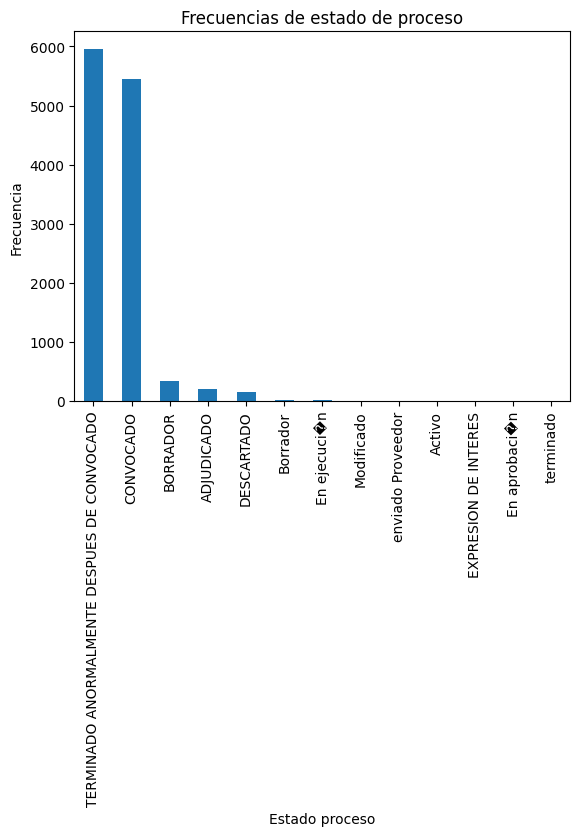

In [73]:
state_process = df_contract_0['estado_del_proceso'].value_counts()
state_process.plot(kind = 'bar')

#Agrega etiquetas y label al gráfico
plt.xlabel('Estado proceso')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de estado de proceso')

Verificamos cuáles de los contratos con valor en 0 tiene fecha de firma informado.

In [74]:
date_val = df_contract_0['fecha_de_firma_del_contrato'].value_counts()
date_val

fecha_de_firma_del_contrato
03/04/2021    3
11/17/2021    2
03/05/2021    2
01/08/2021    1
12/06/2018    1
11/22/2022    1
08/16/2022    1
10/02/2023    1
12/26/2022    1
10/11/2023    1
03/03/2021    1
01/13/2021    1
08/11/2023    1
12/17/2020    1
10/12/2022    1
07/27/2021    1
10/25/2021    1
06/28/2023    1
02/03/2022    1
02/23/2023    1
Name: count, dtype: int64

In [75]:
date_val.count()/df_contract_0.shape[0]

0.0016452780519907865

Dado que no conocemos causales de fechas de contratación sin informar ni valores de contratos en 0, y nuestro objetivo es verificar datos historicos de contratación relacionados a montos y fechas etc., y tendríamos que contactar a dueños de datos para hacer estas validaciones, diremos que los datos válidos para nuestro análisis corresponden a registros que no tengan estas características

In [76]:
#Crea df sin valores de contrato en 0
df_final = df_temp[df_temp['valor_contrato'] != 0]
df_final.shape

(8570, 21)

In [77]:
#Valida cifra de de contratos sin fecha de firma
df_final['fecha_de_firma_del_contrato'].isnull().sum()

520

In [78]:
#Registros a trabajar
df_temp.shape[0] - df_contract_0.shape[0] - df_final['fecha_de_firma_del_contrato'].isnull().sum()

8050

In [79]:
#Omitimos registros sin fecha de firma de contrato
df_final = df_final[~df_final['fecha_de_firma_del_contrato'].isnull()]
df_final.shape

(8050, 21)

In [80]:
#Validacion de registro
df_final[df_final['numero_del_contrato'] == 'CO1.PCCNTR.972739']

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion


Para facilitar implementación de ejercicio se genera un campo con la estrutua YYYY-MM

In [81]:
#Estandarizacion de estructura de fecha A YYYY-MM-DD en caso de requerirlo.
#Tipos de estructura:
#   - YYYY-MM-DDT00:00:00.0000
#   - YYYY-MM-DD

df_final['fecha_de_firma_del_contrato'] = df_final['fecha_de_firma_del_contrato'].str.split('T').str.get(0)

In [82]:
df_final.dtypes

nivel_entidad                   object
nombre_de_la_entidad            object
nit_de_la_entidad               object
departamento_entidad            object
municipio_entidad               object
estado_del_proceso              object
modalidad_de_contrataci_n       object
objeto_a_contratar              object
objeto_del_proceso              object
tipo_de_contrato                object
tipo_contrato                   object
numero_del_contrato             object
numero_de_proceso               object
valor_contrato                 float64
nom_raz_social_contratista      object
url_contrato                    object
origen                          object
documento_proveedor             object
fecha_de_firma_del_contrato     object
fecha_inicio_ejecucion          object
fecha_fin_ejecucion             object
dtype: object

In [83]:
#Se extrae año
df_final['year_firma'] = df_final['fecha_de_firma_del_contrato'].str.split('/').str.get(2)
df_final.head(2)

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,year_firma
937,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,834000421,Arauca,Arauca,terminado,M�nima cuant�a,COMPRA DE PAPELER�A PARA EL DESARROLLO DE ACTI...,COMPRA DE PAPELER�A PARA EL DESARROLLO DE ACTI...,Compraventa,Compraventa,CO1.PCCNTR.2972096,CO1.BDOS.2322029,1499829.0,CENTRAL DE SUMINISTROS LTDA,https://community.secop.gov.co/Public/Tenderin...,SECOP II,804003744,10/29/2021,2021-10-29T00:00:00.000,2021-11-27T00:00:00.000,2021
975,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,844000729,Casanare,Yopal,Activo,M�nima cuant�a,CONTRATAR EL MANTENIMIENTO PREVENTIVO CORRECT...,CONTRATAR EL MANTENIMIENTO PREVENTIVO CORRECT...,Prestaci�n de servicios,Prestaci�n de servicios,CO1.PCCNTR.1198701,CO1.BDOS.981826,14680000.0,SUMINISTROS CR,https://community.secop.gov.co/Public/Tenderin...,SECOP II,1118552629,11/29/2019,2019-11-27T00:00:00.000,2019-12-16T00:00:00.000,2019


In [84]:
#Se extrae mes
df_final['month_firma'] = df_final['fecha_de_firma_del_contrato'].str.split('/').str.get(0)

In [85]:
#Se genera campo a partir de la concatenación de año y mes
df_final['fecha_firma_yyyymm'] = df_final['year_firma'] + '-' + df_final['month_firma']

In [86]:
df_final.head(2)

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,year_firma,month_firma,fecha_firma_yyyymm
937,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,834000421,Arauca,Arauca,terminado,M�nima cuant�a,COMPRA DE PAPELER�A PARA EL DESARROLLO DE ACTI...,COMPRA DE PAPELER�A PARA EL DESARROLLO DE ACTI...,Compraventa,Compraventa,CO1.PCCNTR.2972096,CO1.BDOS.2322029,1499829.0,CENTRAL DE SUMINISTROS LTDA,https://community.secop.gov.co/Public/Tenderin...,SECOP II,804003744,10/29/2021,2021-10-29T00:00:00.000,2021-11-27T00:00:00.000,2021,10,2021-10
975,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,844000729,Casanare,Yopal,Activo,M�nima cuant�a,CONTRATAR EL MANTENIMIENTO PREVENTIVO CORRECT...,CONTRATAR EL MANTENIMIENTO PREVENTIVO CORRECT...,Prestaci�n de servicios,Prestaci�n de servicios,CO1.PCCNTR.1198701,CO1.BDOS.981826,14680000.0,SUMINISTROS CR,https://community.secop.gov.co/Public/Tenderin...,SECOP II,1118552629,11/29/2019,2019-11-27T00:00:00.000,2019-12-16T00:00:00.000,2019,11,2019-11


In [87]:
#Eliminamos duplicados

df_final = df_final.drop_duplicates()

In [88]:
#Drop column with "type of contract" duplicated
df_final.drop('tipo_contrato', axis=1, inplace=True) 

In [89]:
df_final.head(4)

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,year_firma,month_firma,fecha_firma_yyyymm
937,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,834000421,Arauca,Arauca,terminado,M�nima cuant�a,COMPRA DE PAPELER�A PARA EL DESARROLLO DE ACTI...,COMPRA DE PAPELER�A PARA EL DESARROLLO DE ACTI...,Compraventa,CO1.PCCNTR.2972096,CO1.BDOS.2322029,1499829.0,CENTRAL DE SUMINISTROS LTDA,https://community.secop.gov.co/Public/Tenderin...,SECOP II,804003744,10/29/2021,2021-10-29T00:00:00.000,2021-11-27T00:00:00.000,2021,10,2021-10
975,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,844000729,Casanare,Yopal,Activo,M�nima cuant�a,CONTRATAR EL MANTENIMIENTO PREVENTIVO CORRECT...,CONTRATAR EL MANTENIMIENTO PREVENTIVO CORRECT...,Prestaci�n de servicios,CO1.PCCNTR.1198701,CO1.BDOS.981826,14680000.0,SUMINISTROS CR,https://community.secop.gov.co/Public/Tenderin...,SECOP II,1118552629,11/29/2019,2019-11-27T00:00:00.000,2019-12-16T00:00:00.000,2019,11,2019-11
994,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,Activo,Contrataci�n Directa (con ofertas),CONTRATAR LOS SERVICIOS DE INSTRUCTOR EN LA AS...,CONTRATAR LOS SERVICIOS DE INSTRUCTOR EN LA AS...,Prestaci�n de servicios,CO1.PCCNTR.215719,CO1.BDOS.227421,1657520.0,LUIS ALBERTO GUEVARA BLANCO,https://community.secop.gov.co/Public/Tenderin...,SECOP II,13489521,10/12/2017,2017-07-11T00:00:00.000,2017-10-30T00:00:00.000,2017,10,2017-10
1,No Definido,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,Distrito Capital de Bogot�,Bogot�,terminado,Contrataci�n directa,PRESTAR POR SUS PROPIOS MEDIOS CON PLENA AUTON...,PRESTAR POR SUS PROPIOS MEDIOS CON PLENA AUTON...,Prestaci�n de servicios,CO1.PCCNTR.1612739,CO1.BDOS.1280518,26016666.0,LILIANA PATRICIA HORMAZA URREGO,https://community.secop.gov.co/Public/Tenderin...,SECOP II,53073695,06/05/2020,2020-06-05T00:00:00.000,2020-12-31T00:00:00.000,2020,06,2020-06


Enviamos a csv la data para procesar en proyecto

In [90]:
df_final.to_csv('data_processed.csv', index=False )

In [91]:
df_final.shape


(8016, 23)

In [92]:
val_date = df_final['fecha_firma_yyyymm'].value_counts()
val_date

fecha_firma_yyyymm
2018-12    221
2018-06    200
2018-11    185
2018-05    183
2023-05    180
          ... 
2016-11      4
2016-10      4
2017-04      3
2016-08      3
2016-09      1
Name: count, Length: 91, dtype: int64

Para conectar con ejercicio

In [93]:
#Conversion de campo a tipo fecha
df_final['fecha_firma_yyymm'] = pd.to_datetime(df_final['fecha_firma_yyyymm'])


In [94]:
#Filtro año
df_filt = df_final[df_final['year_firma'] == '2022']

In [95]:
#Se suma valor de contrato por fecha de firma
contract_value = df_filt.groupby('fecha_firma_yyymm')['valor_contrato'].sum()

Text(0, 0.5, 'Valores contrato')

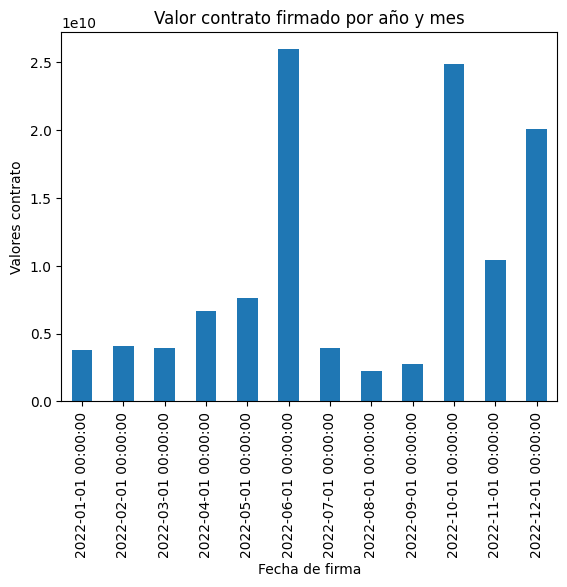

In [96]:
#Se grafica
contract_value.plot(kind ='bar')
plt.title('Valor contrato firmado por año y mes')
plt.xlabel('Fecha de firma')
plt.ylabel('Valores contrato')

In [97]:
df_final.dtypes

nivel_entidad                          object
nombre_de_la_entidad                   object
nit_de_la_entidad                      object
departamento_entidad                   object
municipio_entidad                      object
estado_del_proceso                     object
modalidad_de_contrataci_n              object
objeto_a_contratar                     object
objeto_del_proceso                     object
tipo_de_contrato                       object
numero_del_contrato                    object
numero_de_proceso                      object
valor_contrato                        float64
nom_raz_social_contratista             object
url_contrato                           object
origen                                 object
documento_proveedor                    object
fecha_de_firma_del_contrato            object
fecha_inicio_ejecucion                 object
fecha_fin_ejecucion                    object
year_firma                             object
month_firma                       

# Lectura archivo - Valida nits

In [98]:
file_read = pd.read_csv('.\data_processed.csv', delimiter=',')
file_read
    

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,year_firma,month_firma,fecha_firma_yyyymm
0,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,834000421,Arauca,Arauca,terminado,M�nima cuant�a,COMPRA DE PAPELER�A PARA EL DESARROLLO DE ACTI...,COMPRA DE PAPELER�A PARA EL DESARROLLO DE ACTI...,Compraventa,CO1.PCCNTR.2972096,CO1.BDOS.2322029,1499829.0,CENTRAL DE SUMINISTROS LTDA,https://community.secop.gov.co/Public/Tenderin...,SECOP II,804003744,10/29/2021,2021-10-29T00:00:00.000,2021-11-27T00:00:00.000,2021,10,2021-10
1,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,844000729,Casanare,Yopal,Activo,M�nima cuant�a,CONTRATAR EL MANTENIMIENTO PREVENTIVO CORRECT...,CONTRATAR EL MANTENIMIENTO PREVENTIVO CORRECT...,Prestaci�n de servicios,CO1.PCCNTR.1198701,CO1.BDOS.981826,14680000.0,SUMINISTROS CR,https://community.secop.gov.co/Public/Tenderin...,SECOP II,1118552629,11/29/2019,2019-11-27T00:00:00.000,2019-12-16T00:00:00.000,2019,11,2019-11
2,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,Activo,Contrataci�n Directa (con ofertas),CONTRATAR LOS SERVICIOS DE INSTRUCTOR EN LA AS...,CONTRATAR LOS SERVICIOS DE INSTRUCTOR EN LA AS...,Prestaci�n de servicios,CO1.PCCNTR.215719,CO1.BDOS.227421,1657520.0,LUIS ALBERTO GUEVARA BLANCO,https://community.secop.gov.co/Public/Tenderin...,SECOP II,13489521,10/12/2017,2017-07-11T00:00:00.000,2017-10-30T00:00:00.000,2017,10,2017-10
3,No Definido,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,Distrito Capital de Bogot�,Bogot�,terminado,Contrataci�n directa,PRESTAR POR SUS PROPIOS MEDIOS CON PLENA AUTON...,PRESTAR POR SUS PROPIOS MEDIOS CON PLENA AUTON...,Prestaci�n de servicios,CO1.PCCNTR.1612739,CO1.BDOS.1280518,26016666.0,LILIANA PATRICIA HORMAZA URREGO,https://community.secop.gov.co/Public/Tenderin...,SECOP II,53073695,06/05/2020,2020-06-05T00:00:00.000,2020-12-31T00:00:00.000,2020,6,2020-06
4,No Definido,RECLUSION DE MUJERES DE POPAYAN INPEC,817001267,Cauca,Popay�n,Cerrado,M�nima cuant�a,CONTRATAR EL SUMINISTRO DE ELEMENTOS DE ASEO P...,CONTRATAR EL SUMINISTRO DE ELEMENTOS DE ASEO P...,Suministros,CO1.PCCNTR.953302,CO1.BDOS.820248,6188499.0,POLYFLEX,https://community.secop.gov.co/Public/Tenderin...,SECOP II,10125834,05/08/2019,2019-05-07T00:00:00.000,2019-12-31T00:00:00.000,2019,5,2019-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,No Definido,CARCEL Y PENITENCIARIA CON ALTA Y MEDIA SEGURI...,810006053,Caldas,La Dorada,Modificado,Selecci�n abreviada subasta inversa,CONTRATAR MATERIA PRIMA MINERALES PROTE�NA VER...,CONTRATAR MATERIA PRIMA MINERALES PROTE�NA VER...,Suministros,CO1.PCCNTR.5534416,CO1.BDOS.5067686,184858360.0,UNION TEMPORAL RODRIGUEZ AVILA,https://community.secop.gov.co/Public/Tenderin...,SECOP II,No Definido,11/14/2023,2023-11-15T00:00:00.000,2023-12-31T00:00:00.000,2023,11,2023-11
8012,No Definido,CARCEL Y PENITENCIARIA CON ALTA Y MEDIA SEGURI...,810006053,Caldas,La Dorada,En ejecuci�n,M�nima cuant�a,CONTRATAR MATERIA PRIMA MINERALES ACEITES GRAS...,CONTRATAR MATERIA PRIMA MINERALES ACEITES GRAS...,Suministros,CO1.PCCNTR.5685780,CO1.BDOS.5306176,39893500.0,YOHN FREDY ARCILA SOTO,https://community.secop.gov.co/Public/Tenderin...,SECOP II,10189904,12/21/2023,2023-12-22T00:00:00.000,2023-12-31T00:00:00.000,2023,12,2023-12
8013,No Definido,INPEC ESTABLECIMIENTO CARCELARIO BARRANQUILLA ...,890102201,Atl�ntico,Barranquilla,En ejecuci�n,M�nima cuant�a,CONTRATAR LA ADQUISICI�N DE DOTACI�N PARA SUPL...,Sin Descripcion,Compraventa,CO1.PCCNTR.5672101,CO1.BDOS.5305237,2640000.0,FUMIGACIONES PLAGAFIN LTDA,https://community.secop.gov.co/Public/Tenderi

In [99]:
#Se suma valor de contrato por fecha de firma
valida_nits = file_read.groupby(['nombre_de_la_entidad','nit_de_la_entidad'])['nit_de_la_entidad'].count()

In [100]:
type(valida_nits)

pandas.core.series.Series

In [101]:
len(valida_nits)

40

In [102]:
valida_nits

nombre_de_la_entidad                                                                                         nit_de_la_entidad
CARCEL Y PENITENCIARIA CON ALTA Y MEDIA SEGURIDAD DE LA DORADA CALDAS  INPEC                                 810006053             194
CARCEL Y PENITENCIARIA DE MEDIA SEGURIDAD DE BUCARAMANGA  INPEC                                              804003036             304
CARCEL Y PENITENCIERIA DE MEDIA SEGURIDAD DE CHIQUINQUIRA  INPEC                                             820000960             137
COBOGINPEC                                                                                                   830032532             336
DIRECCION REGIONAL ORIENTE  INPEC                                                                            804004840             136
EPMSC ARMENIA  INPEC                                                                                         801000907              65
ESCUELA DE FORMACION INPEC                                     

In [103]:
ver_nit = file_read[file_read['nit_de_la_entidad'] != 811010125]
ver_nit

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,year_firma,month_firma,fecha_firma_yyyymm
0,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,834000421,Arauca,Arauca,terminado,M�nima cuant�a,COMPRA DE PAPELER�A PARA EL DESARROLLO DE ACTI...,COMPRA DE PAPELER�A PARA EL DESARROLLO DE ACTI...,Compraventa,CO1.PCCNTR.2972096,CO1.BDOS.2322029,1499829.0,CENTRAL DE SUMINISTROS LTDA,https://community.secop.gov.co/Public/Tenderin...,SECOP II,804003744,10/29/2021,2021-10-29T00:00:00.000,2021-11-27T00:00:00.000,2021,10,2021-10
1,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,844000729,Casanare,Yopal,Activo,M�nima cuant�a,CONTRATAR EL MANTENIMIENTO PREVENTIVO CORRECT...,CONTRATAR EL MANTENIMIENTO PREVENTIVO CORRECT...,Prestaci�n de servicios,CO1.PCCNTR.1198701,CO1.BDOS.981826,14680000.0,SUMINISTROS CR,https://community.secop.gov.co/Public/Tenderin...,SECOP II,1118552629,11/29/2019,2019-11-27T00:00:00.000,2019-12-16T00:00:00.000,2019,11,2019-11
2,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,Activo,Contrataci�n Directa (con ofertas),CONTRATAR LOS SERVICIOS DE INSTRUCTOR EN LA AS...,CONTRATAR LOS SERVICIOS DE INSTRUCTOR EN LA AS...,Prestaci�n de servicios,CO1.PCCNTR.215719,CO1.BDOS.227421,1657520.0,LUIS ALBERTO GUEVARA BLANCO,https://community.secop.gov.co/Public/Tenderin...,SECOP II,13489521,10/12/2017,2017-07-11T00:00:00.000,2017-10-30T00:00:00.000,2017,10,2017-10
3,No Definido,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,Distrito Capital de Bogot�,Bogot�,terminado,Contrataci�n directa,PRESTAR POR SUS PROPIOS MEDIOS CON PLENA AUTON...,PRESTAR POR SUS PROPIOS MEDIOS CON PLENA AUTON...,Prestaci�n de servicios,CO1.PCCNTR.1612739,CO1.BDOS.1280518,26016666.0,LILIANA PATRICIA HORMAZA URREGO,https://community.secop.gov.co/Public/Tenderin...,SECOP II,53073695,06/05/2020,2020-06-05T00:00:00.000,2020-12-31T00:00:00.000,2020,6,2020-06
4,No Definido,RECLUSION DE MUJERES DE POPAYAN INPEC,817001267,Cauca,Popay�n,Cerrado,M�nima cuant�a,CONTRATAR EL SUMINISTRO DE ELEMENTOS DE ASEO P...,CONTRATAR EL SUMINISTRO DE ELEMENTOS DE ASEO P...,Suministros,CO1.PCCNTR.953302,CO1.BDOS.820248,6188499.0,POLYFLEX,https://community.secop.gov.co/Public/Tenderin...,SECOP II,10125834,05/08/2019,2019-05-07T00:00:00.000,2019-12-31T00:00:00.000,2019,5,2019-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,No Definido,CARCEL Y PENITENCIARIA CON ALTA Y MEDIA SEGURI...,810006053,Caldas,La Dorada,Modificado,Selecci�n abreviada subasta inversa,CONTRATAR MATERIA PRIMA MINERALES PROTE�NA VER...,CONTRATAR MATERIA PRIMA MINERALES PROTE�NA VER...,Suministros,CO1.PCCNTR.5534416,CO1.BDOS.5067686,184858360.0,UNION TEMPORAL RODRIGUEZ AVILA,https://community.secop.gov.co/Public/Tenderin...,SECOP II,No Definido,11/14/2023,2023-11-15T00:00:00.000,2023-12-31T00:00:00.000,2023,11,2023-11
8012,No Definido,CARCEL Y PENITENCIARIA CON ALTA Y MEDIA SEGURI...,810006053,Caldas,La Dorada,En ejecuci�n,M�nima cuant�a,CONTRATAR MATERIA PRIMA MINERALES ACEITES GRAS...,CONTRATAR MATERIA PRIMA MINERALES ACEITES GRAS...,Suministros,CO1.PCCNTR.5685780,CO1.BDOS.5306176,39893500.0,YOHN FREDY ARCILA SOTO,https://community.secop.gov.co/Public/Tenderin...,SECOP II,10189904,12/21/2023,2023-12-22T00:00:00.000,2023-12-31T00:00:00.000,2023,12,2023-12
8013,No Definido,INPEC ESTABLECIMIENTO CARCELARIO BARRANQUILLA ...,890102201,Atl�ntico,Barranquilla,En ejecuci�n,M�nima cuant�a,CONTRATAR LA ADQUISICI�N DE DOTACI�N PARA SUPL...,Sin Descripcion,Compraventa,CO1.PCCNTR.5672101,CO1.BDOS.5305237,2640000.0,FUMIGACIONES PLAGAFIN LTDA,https://community.secop.gov.co/Public/Tenderi

In [104]:
ver_nit.shape

(8016, 23)